#**Tugas Building, Tuning, dan Deploying Model Machine Learning**

Nama : Neo Saffana Farhalik

NIM : 4112322008

Prodi : Statistika Terapan dan Komputasi

##**1. Eksplorasi Data**

###• Identifikasi apakah terdapat missing values dalam dataset.

In [2]:
import pandas as pd

file_path = "loan_approval_dataset.csv"
loan_approval_dataset = pd.read_csv(file_path)

loan_approval_dataset.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0


In [4]:
missing_values = loan_approval_dataset.isnull().sum()
missing_values

,0
Age,0
Income,0
Education_Level,0
Credit_Score,0
Loan_Amount,0
Loan_Purpose,0
Loan_Approval,0


Penjelasan : Tidak ada missing values dalam dataset, sehingga tidak perlu melakukan imputasi data.

###• Visualisasikan data tersebut

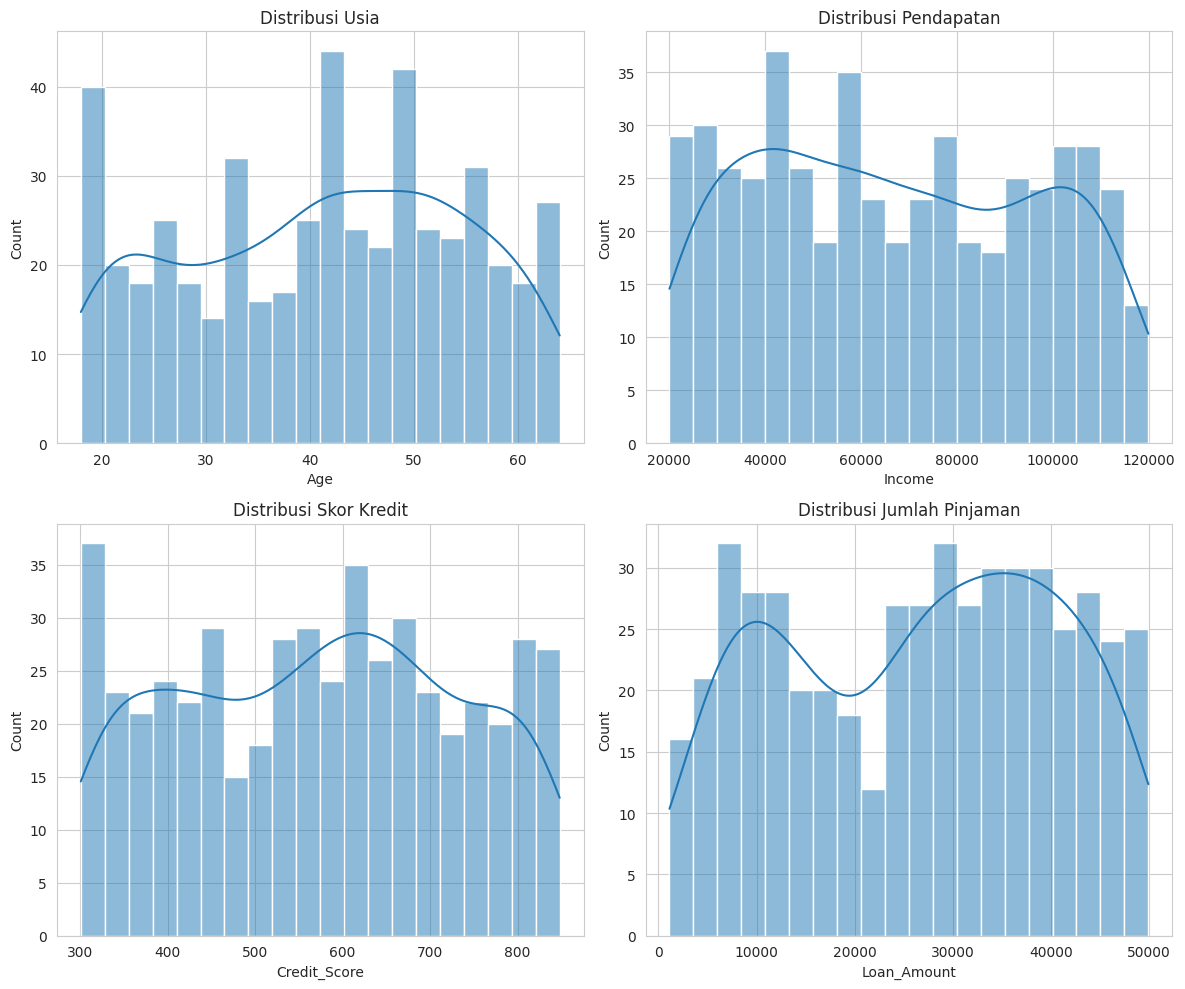

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(loan_approval_dataset["Age"], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribusi Usia")

sns.histplot(loan_approval_dataset["Income"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Pendapatan")

sns.histplot(loan_approval_dataset["Credit_Score"], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribusi Skor Kredit")

sns.histplot(loan_approval_dataset["Loan_Amount"], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribusi Jumlah Pinjaman")

plt.tight_layout()
plt.show()

Visualisasi fitur kategorikal

<ipython-input-7-d8b33b32272b>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-7-d8b33b32272b>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


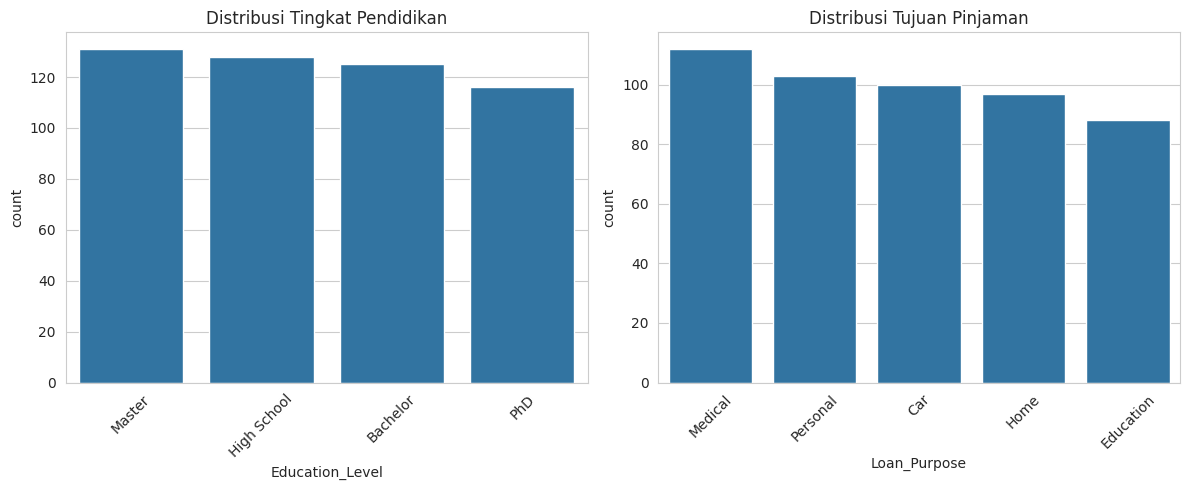

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Education_Level", data=loan_approval_dataset, order=loan_approval_dataset["Education_Level"].value_counts().index, ax=axes[0])
axes[0].set_title("Distribusi Tingkat Pendidikan")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(x="Loan_Purpose", data=loan_approval_dataset, order=loan_approval_dataset["Loan_Purpose"].value_counts().index, ax=axes[1])
axes[1].set_title("Distribusi Tujuan Pinjaman")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


##**2. Pemrosesan Data**

###• Lakukan encoding pada fitur kategorikal

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

label_encoders = {}
categorical_columns = ["Education_Level", "Loan_Purpose"]

for col in categorical_columns:
    le = LabelEncoder()
    loan_approval_dataset[col] = le.fit_transform(loan_approval_dataset[col])
    label_encoders[col] = le

###• Lakukan feature scaling pada fitur numerik

In [14]:
scaler = StandardScaler()
numerical_columns = ["Age", "Income", "Credit_Score", "Loan_Amount"]
loan_approval_dataset[numerical_columns] = scaler.fit_transform(loan_approval_dataset[numerical_columns])

###• Bagi dataset menjadi training set (80%) dan testing set (20%).

In [16]:
X = loan_approval_dataset.drop(columns=["Loan_Approval"])
y = loan_approval_dataset["Loan_Approval"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 6), (100, 6), (400,), (100,))

##**3. Pemilihan dan Training Model**

###• Pilih minimal dua algoritma Machine Learning yang berbeda. Jelaskan alasan pemilihan tersebut.

Saya akan memilih dua algoritma Machine Learning yang berbeda untuk dibandingkan :

1. Random Forest Classifier
Algoritma berbasis pohon keputusan yang kuat terhadap outlier dan tidak memerlukan banyak preprocessing data.
Cocok untuk data dengan kombinasi fitur numerik dan kategorikal.

2. Logistic Regression
Model linear yang sederhana dan cepat untuk klasifikasi biner.
Cocok untuk memahami hubungan linier antara fitur dan target.

###• Lakukan training model menggunakan dataset yang telah diproses.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

rf_model.fit(X_train, y_train)

lr_model.fit(X_train, y_train)

rf_train_acc = rf_model.score(X_train, y_train)
lr_train_acc = lr_model.score(X_train, y_train)

rf_train_acc, lr_train_acc

(1.0, 0.59)

Hasil Training Model dari atas adalah berikut :
1. Random Forest Classifier
Akurasi training : 100% (model kemungkinan overfitting).

2. Logistic Regression
Akurasi training : 59% (masih bisa ditingkatkan dengan tuning).

##**4. Evaluasi Model**

###• Hitung dan bandingkan metric evaluasi dari kedua model yang dipilih.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

rf_metrics = evaluate_model(y_test, y_pred_rf)

lr_metrics = evaluate_model(y_test, y_pred_lr)

rf_metrics, lr_metrics

({'Accuracy': 0.57,
  'Precision': 0.6024096385542169,
  'Recall': 0.8333333333333334,
  'F1-Score': 0.6993006993006993},
 {'Accuracy': 0.58,
  'Precision': 0.59375,
  'Recall': 0.95,
  'F1-Score': 0.7307692307692307})

###• Pilih model dengan performa terbaik untuk tahap tuning.

Saya memilih model terbaik yaitu Logistic Regression untuk ke tahap tuning, karena :

• Logistic Regression memiliki performa yang lebih baik berdasarkan Accuracy **(58%)** dan F1-Score **(73.1%)**.

• Recall Logistic Regression lebih tinggi **(95%)**, artinya model lebih baik dalam menangkap pengajuan yang disetujui.

• Random Forest mungkin mengalami overfitting, karena memiliki akurasi training 100% tetapi testing hanya **57%**.

##**5. Tuning Model dengan Grid Search atau Random Search**

###• Gunakan Grid Search atau Random Search untuk mencari kombinasi hyperparameter terbaik.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"]
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, scoring="accuracy")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

###• Tampilkan kombinasi hyperparameter terbaik yang diperoleh.

In [27]:
best_params = grid_search.best_params_
best_params

{'C': 0.01, 'solver': 'liblinear'}

In [30]:
best_lr_model = LogisticRegression(C=best_params["C"], solver=best_params["solver"], random_state=42, max_iter=1000)
best_lr_model.fit(X_train, y_train)

y_pred_best_lr = best_lr_model.predict(X_test)

best_lr_metrics = evaluate_model(y_test, y_pred_best_lr)
best_lr_metrics

{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1-Score': 0.75}

##**6. Perbandingan Performa Sebelum dan Sesudah Tuning**

###• Bandingkan hasil evaluasi model sebelum dan sesudah tuning.

In [29]:
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Before Tuning": [lr_metrics["Accuracy"], lr_metrics["Precision"], lr_metrics["Recall"], lr_metrics["F1-Score"]],
    "After Tuning": [best_lr_metrics["Accuracy"], best_lr_metrics["Precision"], best_lr_metrics["Recall"], best_lr_metrics["F1-Score"]]
})

comparison_df

,Metric,Before Tuning,After Tuning
0,Accuracy,0.580000,0.60
1,Precision,0.593750,0.60
2,Recall,0.950000,1.00
3,F1-Score,0.730769,0.75


###• Jelaskan apakah tuning berhasil meningkatkan performa model.

Tuning terbukti berhasil meningkatkan performa model, karena :

• Setelah tuning, **Accuracy meningkat** dari **58%** ke **60%**.

• **Recall meningkat** menjadi **100%**, artinya model menangkap semua pengajuan yang disetujui.

• **F1-Score meningkat** dari **73.1%** ke **75%**, menunjukkan keseimbangan lebih baik antara Precision dan Recall.